In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier

In [3]:
np.random.seed(42)
x ,y = make_circles(n_samples = 500 ,
                    factor = 0.1 ,
                    noise = 0.35 ,
                    random_state = 42)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

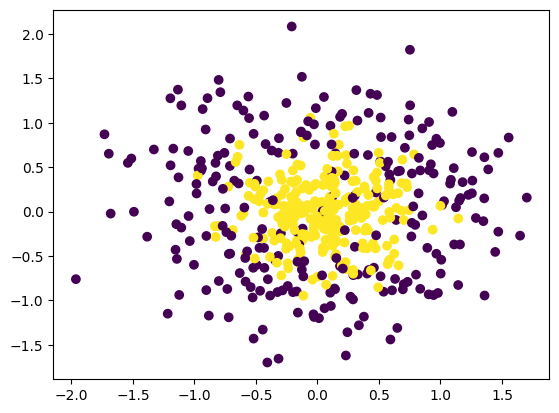

In [7]:
plt.scatter(x[:,0], x[:,1], c = y )

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


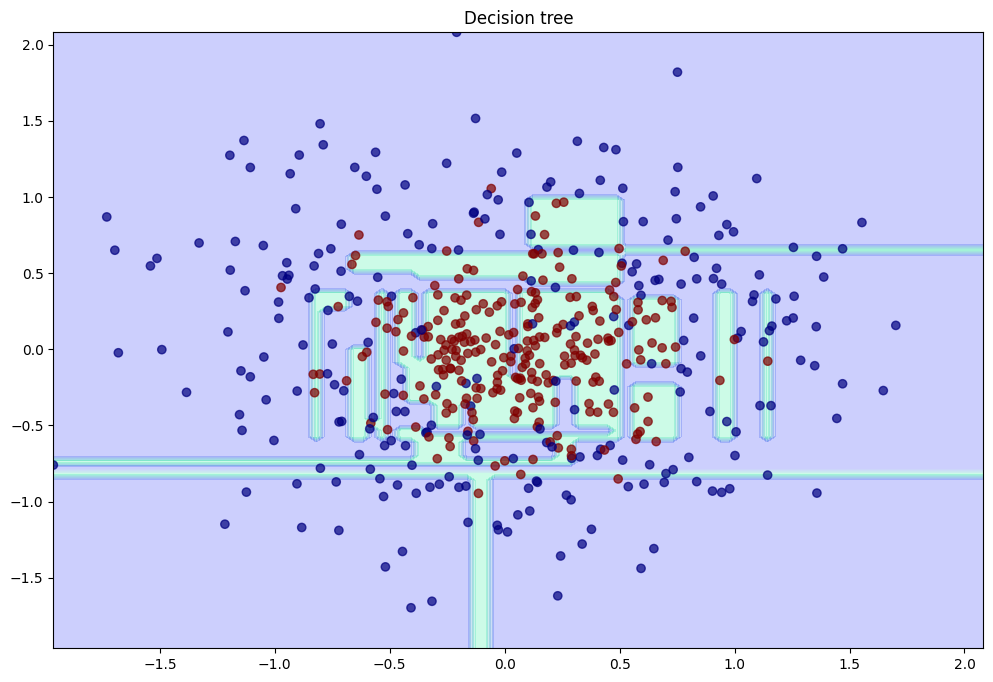

In [14]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(x.min(), x.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2 , cmap = 'winter')
plt.scatter(x[:,0], x[:,1], c=y, cmap='jet', alpha=.7)
plt.title("Decision tree")
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

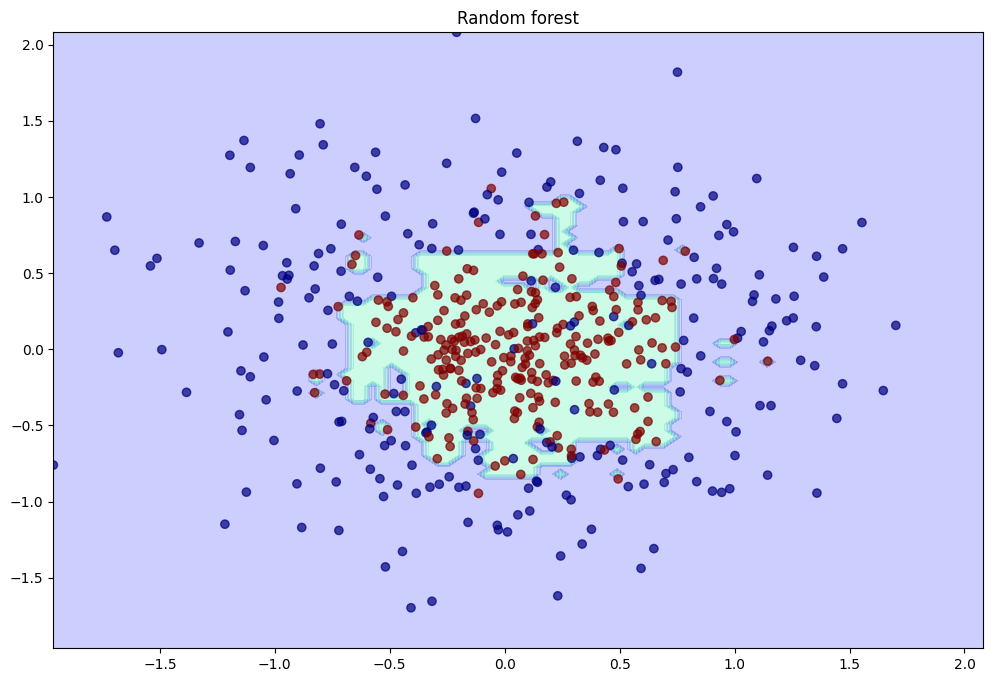

In [18]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(x.min(), x.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2 , cmap = 'winter')
plt.scatter(x[:,0], x[:,1], c=y, cmap='jet', alpha=.7)
plt.title("Random forest")
plt.show()

random forest  is giving  improve / better then decision tree

#  working on Regression problem

In [22]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

x_train, y_train = generate(n_samples=n_train, noise=noise)
x_test, y_test = generate(n_samples=n_test, noise=noise)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(1000, 1)
(150,)
(1000,)


formula used in f(x) function

e <sup> ( -x <sup> 2 </sup> ) </sup> + 1.5 X e <sup>- ( x - 2 )<sup> 2 </sup> </sup>

(-5.0, 5.0)

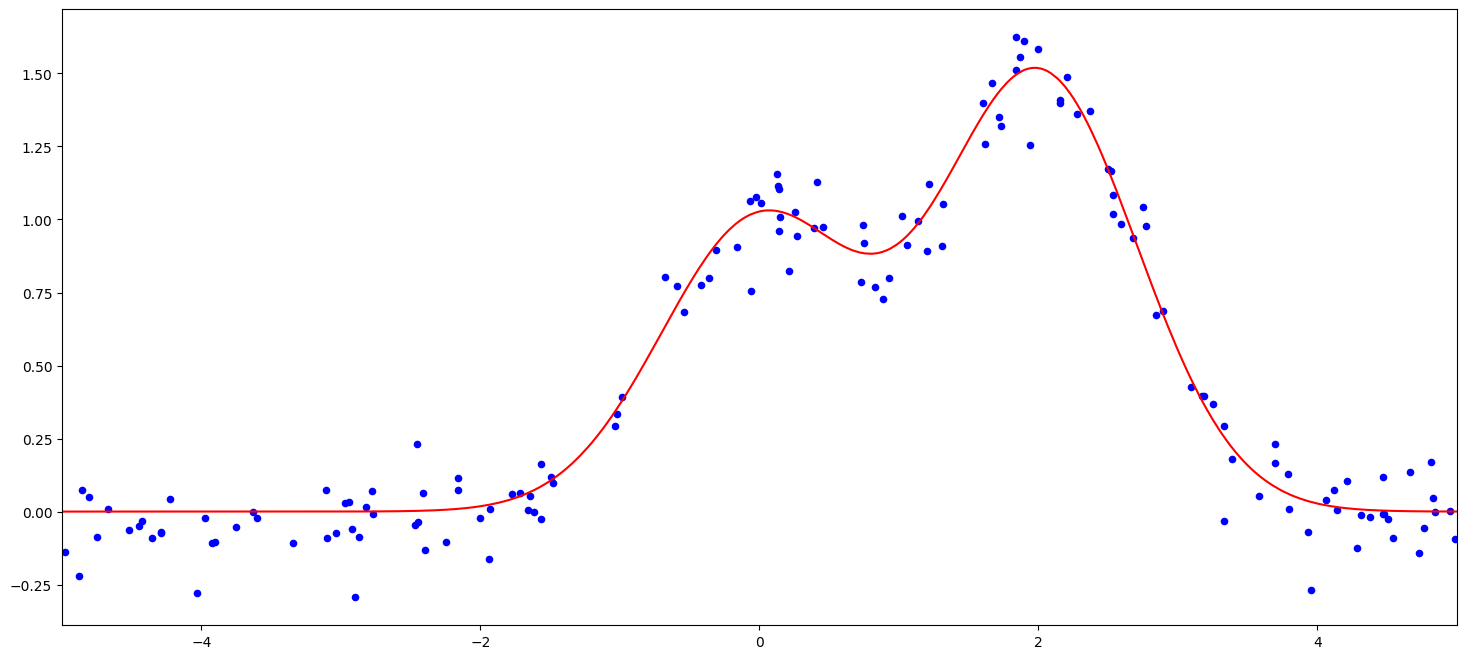

In [29]:
plt.figure(figsize=(18, 8))
plt.plot(x_test, f(x_test), c= "red")
plt.scatter(x_train, y_train, c="blue", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 20.02')

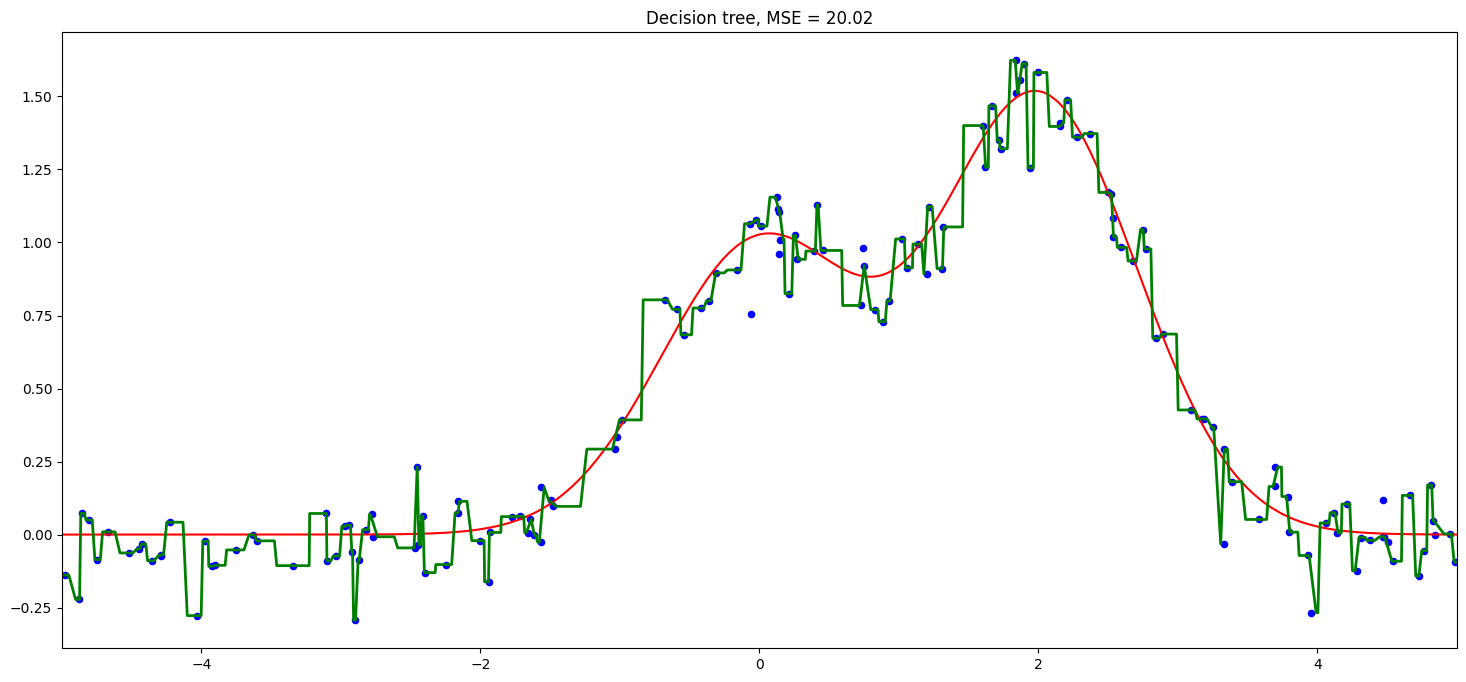

In [31]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(x_train, y_train)
d_predict = dtree.predict(x_test)

plt.figure(figsize=(18, 8))
plt.plot(x_test, f(x_test), "r")
plt.scatter(x_train, y_train, c="b", s=20)
plt.plot(x_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"% np.sum((y_test - d_predict) ** 2))

**Overfitting**

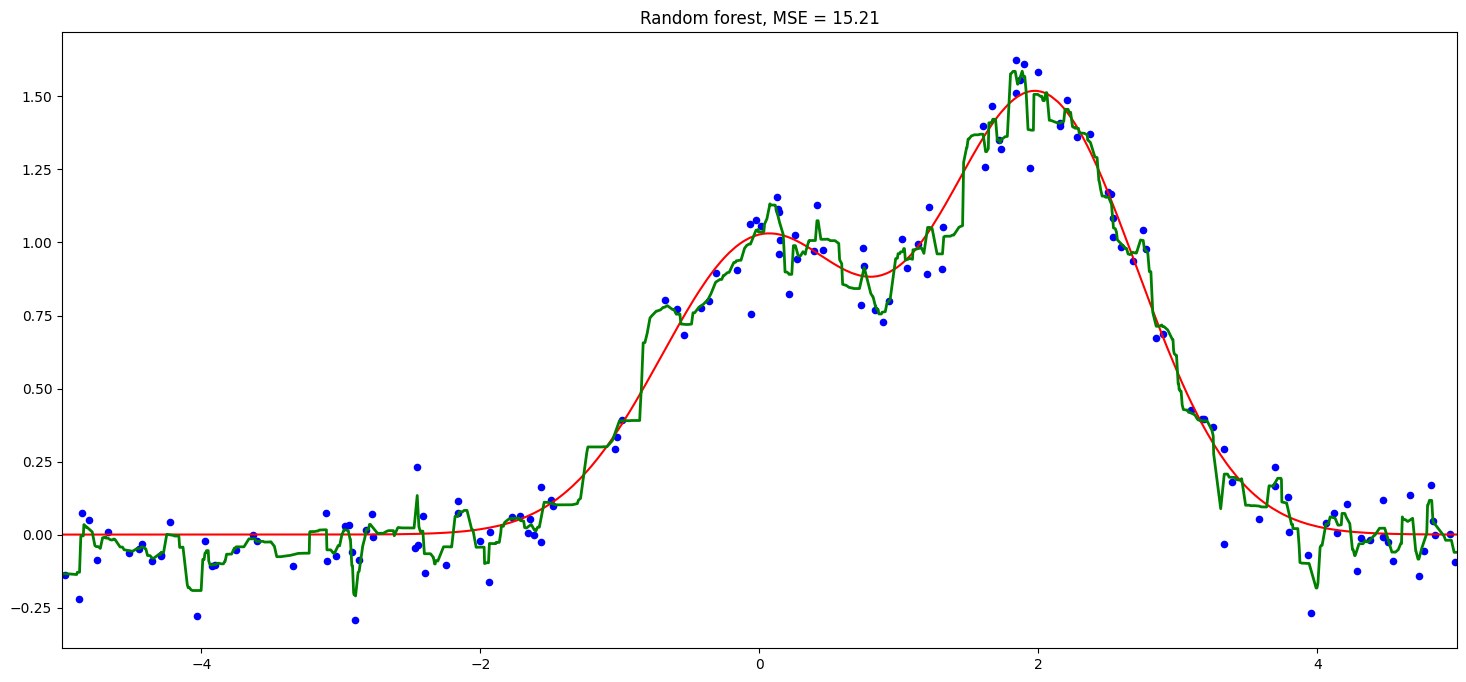

In [33]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(x_train, y_train)
rf_predict = rfr.predict(x_test)

plt.figure(figsize=(18, 8))
plt.plot(x_test, f(x_test), "r")
plt.scatter(x_train, y_train, c="b", s=20)
plt.plot(x_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

Better then one Decision Tree